## Pre Processing

### Importing Libraries

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [192]:
dataset = pd.read_csv('housing.csv')
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [193]:
X = np.concatenate((dataset.iloc[:, :-2].values , dataset.iloc[:, -1:].values), axis=1)
y = dataset.iloc[:, -2].values

In [194]:
print(X)

[[-122.23 37.88 41.0 ... 126.0 8.3252 'NEAR BAY']
 [-122.22 37.86 21.0 ... 1138.0 8.3014 'NEAR BAY']
 [-122.24 37.85 52.0 ... 177.0 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17.0 ... 433.0 1.7 'INLAND']
 [-121.32 39.43 18.0 ... 349.0 1.8672 'INLAND']
 [-121.24 39.37 16.0 ... 530.0 2.3886 'INLAND']]


In [195]:
print(y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


### Taking care of missing data

In [196]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :-1])
X[:, :-1] = imputer.transform(X[:, :-1])

### Encoding Independent Variable

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [198]:
print(X)

[[0.0 0.0 0.0 ... 322.0 126.0 8.3252]
 [0.0 0.0 0.0 ... 2401.0 1138.0 8.3014]
 [0.0 0.0 0.0 ... 496.0 177.0 7.2574]
 ...
 [0.0 1.0 0.0 ... 1007.0 433.0 1.7]
 [0.0 1.0 0.0 ... 741.0 349.0 1.8672]
 [0.0 1.0 0.0 ... 1387.0 530.0 2.3886]]


### Train-Test Split

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [200]:
print(X_train)

[[1.0 0.0 0.0 ... 4601.0 1066.0 2.9184]
 [0.0 0.0 0.0 ... 682.0 246.0 6.3443]
 [0.0 1.0 0.0 ... 1633.0 559.0 1.8385]
 ...
 [0.0 1.0 0.0 ... 1564.0 328.0 2.8347]
 [0.0 0.0 0.0 ... 1545.0 726.0 2.9899]
 [1.0 0.0 0.0 ... 1690.0 1229.0 3.0156]]


In [201]:
print(X_test)

[[0.0 1.0 0.0 ... 836.0 237.0 2.1563]
 [1.0 0.0 0.0 ... 1784.0 591.0 4.0324]
 [1.0 0.0 0.0 ... 1287.0 496.0 5.0782]
 ...
 [0.0 0.0 0.0 ... 828.0 309.0 4.0526]
 [0.0 1.0 0.0 ... 2256.0 770.0 1.8299]
 [0.0 1.0 0.0 ... 26.0 5.0 4.125]]


In [202]:
print(y_train)

[100500. 324700.  67500. ... 115800. 406500. 300000.]


In [203]:
print(y_test)

[ 88300. 211300. 264100. ... 150800.  63100.  67500.]


## Visualisation of Data

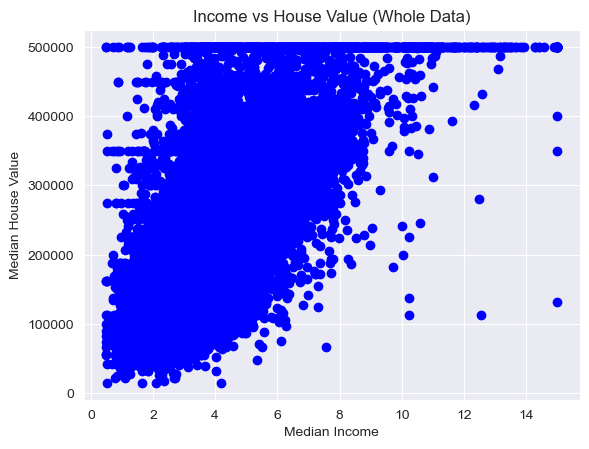

In [204]:
plt.scatter(x=dataset["median_income"], y=dataset["median_house_value"], color='blue')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value (Whole Data)')
plt.show()

## Model Building

In [205]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

## Testing

In [206]:
y_pred = svr.predict(X_test)

In [207]:
check_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
check_df

,Actual,Predicted
0,88300.0,179605.776703
1,211300.0,180171.075643
2,264100.0,180055.532243
3,153800.0,180114.699839
4,189100.0,179536.735645
...,...,...
4123,171000.0,179823.989369
4124,94600.0,179532.493818
4125,150800.0,179707.989184
4126,63100.0,180276.916280


### Accuracy

In [208]:
from sklearn.metrics import r2_score
print(f"The R2 Score for this model is {r2_score(y_test, y_pred)}")

The R2 Score for this model is -0.047836042300392734


# Thus it can be implied that SVR is a bad model for this dataset